<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

## Load the dataframe


Load the data


In [ ]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [ ]:
data.head()

In [ ]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [ ]:
X.head(100)

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [ ]:
Y = data['Class']

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [ ]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)  # Standardize and reassign to X

print("X shape:", X.shape)  # Should be (90, 83)
print("X sample (first row):", X[0])  # Should show standardized values (mean ~0, std ~1)

print("Y shape:", Y.shape)  # Should be (90,)
print("Y unique values:", np.unique(Y))  # Should be [0, 1]

print("Y class distribution:", np.bincount(Y))

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [ ]:
Y_test.shape

print("X_train shape:", X_train.shape)  # Should be (72, 83)
print("X_test shape:", X_test.shape)    # Should be (18, 83)
print("Y_train shape:", Y_train.shape)  # Should be (72,)
print("Y_test shape:", Y_test.shape)    # Should be (18,)

In [ ]:
print("X_train mean (should be ~0):", X_train.mean(axis=0))
print("X_train std (should be ~1):", X_train.std(axis=0))

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
# Create GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
accuracy = logreg_cv.score(X_test, Y_test)
print("Test accuracy: ", accuracy)

Lets look at the confusion matrix:


In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'kernel':('linear','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
# Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
svm_cv.best_score_

## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
test_accuracy = svm_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)

We can plot the confusion matrix


In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree = DecisionTreeClassifier(random_state=2)
tree_cv = GridSearchCV(tree, parameters, cv=10, n_jobs=-1)
tree_cv.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [ ]:
accuracy = tree_cv.score(X_test, Y_test)

We can plot the confusion matrix


In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(knn, parameters, cv=10, n_jobs=-1)
knn_cv.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [ ]:
accuracy = knn_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy)

We can plot the confusion matrix


In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [ ]:
models = {
    'Logistic Regression': logreg_cv,
    'SVM': svm_cv,
    'Decision Tree': tree_cv,
    'KNN': knn_cv
}

best_model_name = None
best_accuracy = 0

for name, model in models.items():
    accuracy = model.score(X_test, Y_test)
    print(f"{name} accuracy: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

print(f"\nBest performing model: {best_model_name} with accuracy {best_accuracy:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming models are defined from Tasks 4, 6, 8, 10
models = {
    'Logistic Regression': logreg_cv,
    'SVM': svm_cv,
    'Decision Tree': tree_cv,
    'KNN': knn_cv
}

# Collect model names and test accuracies
model_names = list(models.keys())
accuracies = [model.score(X_test, Y_test) for model in models.values()]

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Classification Models')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for clarity
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.4f}', ha='center', va='bottom')
plt.show()

Logistic Regression:
  Test Accuracy: 0.8333
  F1-Score: 0.8889
  Precision: 0.8000
  Recall: 1.0000
  Mean CV Score: 0.8464
  Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
SVM:
  Test Accuracy: 0.8333
  F1-Score: 0.8889
  Precision: 0.8000
  Recall: 1.0000
  Mean CV Score: 0.8482
  Best Params: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Decision Tree:
  Test Accuracy: 0.8333
  F1-Score: 0.8889
  Precision: 0.8000
  Recall: 1.0000
  Mean CV Score: 0.8768
  Best Params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
KNN:
  Test Accuracy: 0.8333
  F1-Score: 0.8889
  Precision: 0.8000
  Recall: 1.0000
  Mean CV Score: 0.8482
  Best Params: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}

Best model: Decision Tree (F1: 0.8889, CV Score: 0.8768)


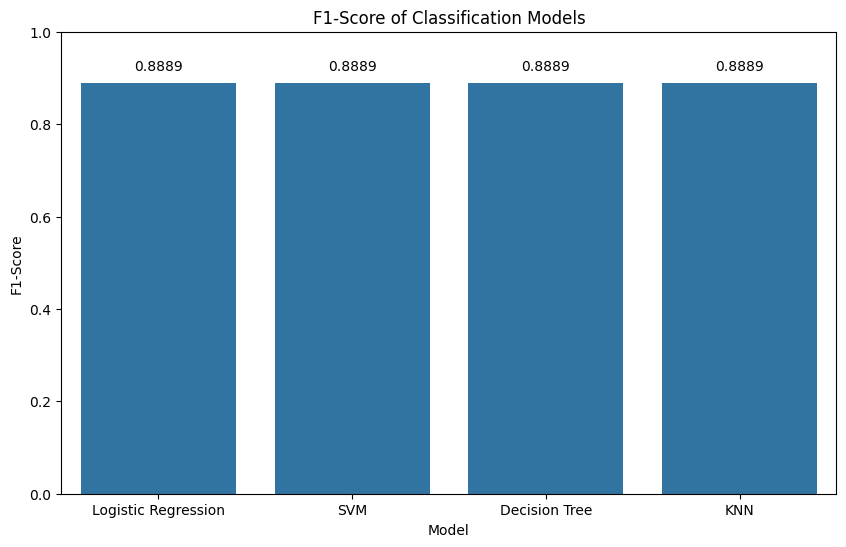

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score

# Assuming models are defined from Tasks 4, 6, 8, 10
models = {
    'Logistic Regression': logreg_cv,
    'SVM': svm_cv,
    'Decision Tree': tree_cv,
    'KNN': knn_cv
}

# Collect metrics
model_names = []
accuracies = []
f1_scores = []
precisions = []
recalls = []
cv_scores = []

for name, model in models.items():
    yhat = model.predict(X_test)
    accuracy = model.score(X_test, Y_test)
    f1 = f1_score(Y_test, yhat)
    precision = precision_score(Y_test, yhat)
    recall = recall_score(Y_test, yhat)
    cv_score = model.best_score_  # Mean CV score from GridSearchCV
    model_names.append(name)
    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    cv_scores.append(cv_score)
    print(f"{name}:")
    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Mean CV Score: {cv_score:.4f}")
    print(f"  Best Params: {model.best_params_}")

# Determine best model (prioritize F1, then CV score, then simplicity)
best_model_name = model_names[0]
best_f1 = f1_scores[0]
best_cv_score = cv_scores[0]
for i, name in enumerate(model_names):
    if f1_scores[i] > best_f1 or (f1_scores[i] == best_f1 and cv_scores[i] > best_cv_score):
        best_f1 = f1_scores[i]
        best_cv_score = cv_scores[i]
        best_model_name = name
    elif f1_scores[i] == best_f1 and cv_scores[i] == best_cv_score:
        # Tiebreaker: Prefer simpler model (Decision Tree > Logistic Regression > KNN > SVM)
        model_priority = {'Decision Tree': 1, 'Logistic Regression': 2, 'KNN': 3, 'SVM': 4}
        if model_priority[name] < model_priority[best_model_name]:
            best_model_name = name

print(f"\nBest model: {best_model_name} (F1: {best_f1:.4f}, CV Score: {best_cv_score:.4f})")

# Bar chart for F1-scores
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=f1_scores)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score of Classification Models')
plt.ylim(0, 1)
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.02, f'{f1:.4f}', ha='center', va='bottom')
plt.show()

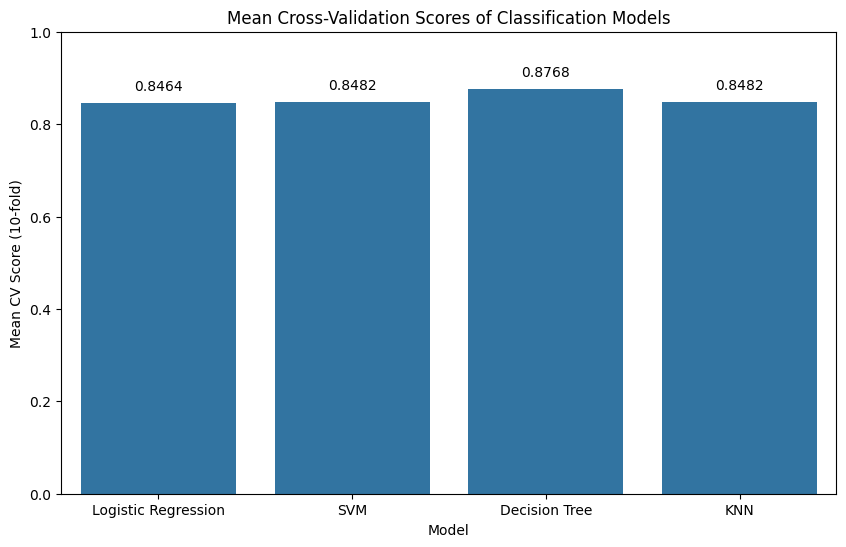

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming models are defined from Tasks 4, 6, 8, 10
models = {
    'Logistic Regression': logreg_cv,
    'SVM': svm_cv,
    'Decision Tree': tree_cv,
    'KNN': knn_cv
}

# Collect model names and CV scores
model_names = list(models.keys())
cv_scores = [model.best_score_ for model in models.values()]

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=cv_scores)
plt.xlabel('Model')
plt.ylabel('Mean CV Score (10-fold)')
plt.title('Mean Cross-Validation Scores of Classification Models')
plt.ylim(0, 1)
for i, score in enumerate(cv_scores):
    plt.text(i, score + 0.02, f'{score:.4f}', ha='center', va='bottom')
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
